In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
path = r"C:\Users\ADVAN\pkb\model1.csv"
df = pd.read_csv(path, sep= ",")


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_8040\2640100649.py:2: DtypeWarning: Columns (26,27,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep= ",")


In [14]:
# print(df.columns.tolist())
# df.columns = df.columns.str.strip().str.replace(' ', '_')
# df = df.dropna(subset=['Outlier'])


# # df = df.drop(columns=['51291'], ['Unnamed:_27'])
# berguna1 = ['Customer_Name','Ship_Date']    
# df = df[berguna1]
# df
# df.head(10)

In [15]:
df1 = df.drop(["51291", "Unnamed: 29", "Unnamed: 30", "Unnamed: 31", "Row ID", "Outlier", "Unnamed: 27", "Postal Code"], axis=1)

df1.head()

,Order ID,Order Date,Tahun,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Keterangan
0,AG-2011-2040,01/01/2011,2011,06/01/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue","$408,30",2,0%,"$106,14","$35,46",Medium,OUTLIER
1,IN-2011-47883,01/01/2011,2011,08/01/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed","$120,37",3,10%,"$36,04","$9,72",Medium,NOT OUTLIER
2,HU-2011-1220,01/01/2011,2011,05/01/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width","$66,12",4,0%,"$29,64","$8,17",High,NOT OUTLIER
3,IT-2011-3647632,01/01/2011,2011,05/01/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium","$44,87",3,50%,"-$26,06","$4,82",High,OUTLIER
4,IN-2011-47883,01/01/2011,2011,08/01/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack","$113,67",5,10%,"$37,77","$4,70",Medium,NOT OUTLIER


In [16]:
df1.describe()

,Tahun,Quantity
count,51290.000000,51290.000000
mean,2012.777208,3.476545
std,1.098931,2.278766
min,2011.000000,1.000000
25%,2012.000000,2.000000
50%,2013.000000,3.000000
75%,2014.000000,5.000000
max,2014.000000,14.000000


In [17]:
df1.shape    

(51290, 24)

In [18]:
df1.isna().sum()

Order ID          0
Order Date        0
Tahun             0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Keterangan        0
dtype: int64

In [19]:
df1.shape   

(51290, 24)

In [20]:
# kmeans = KMeans(n_clusters=4, random_state=42)
# y_predicted = km.fit_predict(df[['TEKANAN_DARAH', 'BERAT_BADAN']])
# y_predict = kmeans.fit_predict(df1[['']])
# df1['cluster'] = kmeans.fit_predict(df1)
# df1

In [22]:
# bersihkan kolom nilai uang & persen (hilangkan simbol $, %, dan ubah ke float)
df1['Sales'] = df1['Sales'].replace('[\$,]', '', regex=True).astype(float)
df1['Profit'] = df1['Profit'].replace('[\$,]', '', regex=True).astype(float)
df1['Shipping Cost'] = df1['Shipping Cost'].replace('[\$,]', '', regex=True).astype(float)
df1['Discount'] = df1['Discount'].replace('[\%,]', '', regex=True).astype(float)/100

# pilih fitur numerik utama
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
df_num = df1[num_cols]

# normalisasi/visualisasi
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)
df_scaled
print(type(df_num))
print(df_num.dtypes)

<class 'pandas.core.frame.DataFrame'>
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
Shipping Cost    float64
dtype: object


c:\Users\ADVAN\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ADVAN\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\ADVAN\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ADVAN\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

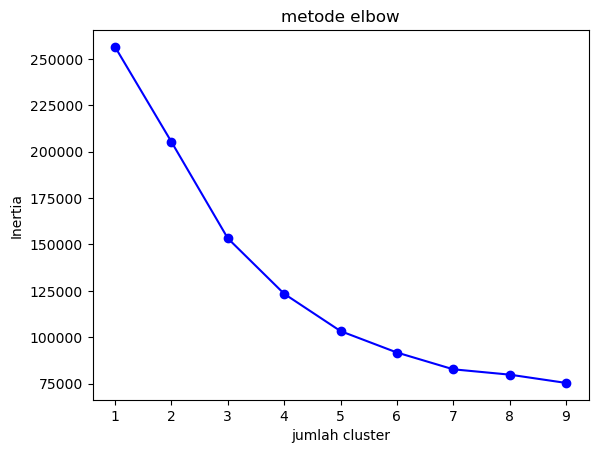

In [ ]:
# # clsuter ideal: metode elbow, silhouette score
# inertia = []
# for i in range(1, 10):
#     km = KMeans(n_clusters=i, random_state=42)
#     km.fit(df_scaled)
#     inertia.append(km.inertia_)

# plt.plot(range(1, 10), inertia, 'bo-')
# plt.xlabel("jumlah cluster")
# plt.ylabel("Inertia")
# plt.title("metode elbow")
# plt.show()

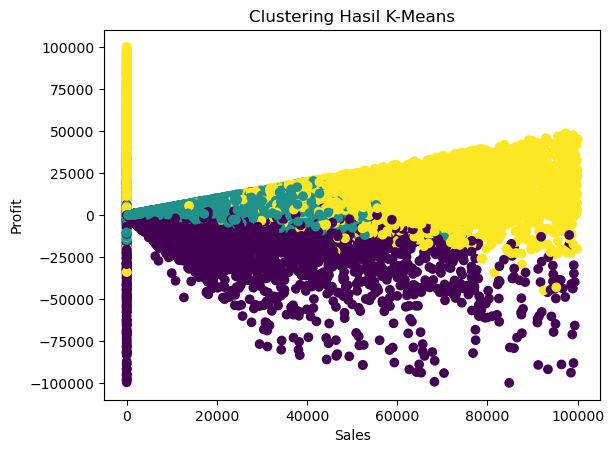

In [ ]:
km = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = km.fit_predict(df_scaled)

plt.scatter(df['Sales'], df['Profit'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Clustering Hasil K-Means')
plt.show()


In [ ]:
cluster_summary = df.groupby('Cluster')[num_cols].mean()
print(cluster_summary)


                Sales  Quantity  Discount        Profit  Shipping Cost
Cluster                                                               
0        10742.179585  3.324026  0.519419  -6662.124943    1462.072620
1         9960.835807  3.032874  0.042774   2088.390135    1121.177482
2        43039.146603  5.493941  0.059409  17158.433215   10390.367146
